# **Introduction + Data analysis and visualization**
---

#### Importing Libraries

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Loading Data and Overview

In [111]:
d = pd.read_csv('EVChargingStationUsage.csv')
d

/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_90222/3980714148.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  d = pd.read_csv('EVChargingStationUsage.csv')


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [112]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [113]:
d.describe()

,Energy (kWh),GHG Savings (kg),Gasoline Savings (gallons),Port Number,EVSE ID,Postal Code,Latitude,Longitude,Fee,Plug In Event Id,Driver Postal Code,System S/N
count,259415.000000,259415.000000,259415.000000,259415.000000,1.804670e+05,259415.000000,259415.000000,259415.000000,259415.000000,2.594150e+05,251013.000000,1.804670e+05
mean,8.544277,3.588596,1.072306,1.591627,1.462973e+05,94302.315768,37.439565,-122.151264,1.097481,1.188685e+08,94170.308255,1.443790e+11
std,7.185462,3.017894,0.901776,0.491534,2.429677e+05,1.941657,0.009621,0.015382,1.934408,4.057750e+08,4249.837126,2.483280e+10
min,0.010000,0.004000,0.001000,1.000000,3.792000e+03,94301.000000,37.422104,-122.163239,0.000000,1.000000e+00,1013.000000,1.023100e+11
25%,3.784000,1.589000,0.475000,1.000000,4.358300e+04,94301.000000,37.428318,-122.162170,0.000000,1.573000e+03,94087.000000,1.231100e+11
50%,6.868634,2.885000,0.862000,2.000000,1.074270e+05,94301.000000,37.444489,-122.158272,0.000000,3.573000e+03,94304.000000,1.427410e+11
75%,11.458340,4.813000,1.438000,2.000000,1.745590e+05,94303.000000,37.446613,-122.145699,1.640000,6.340000e+03,94804.000000,1.705410e+11
max,97.360000,40.891000,12.219000,2.000000,5.535441e+06,94306.000000,37.449375,-122.112480,84.560000,1.609436e+09,99354.000000,2.002410e+11


## Data quality
#### Missing values

In [114]:
#Making a function to check for missing values, that can be called later on
def check_missing_values(df):
    missing_cols = df.isnull().sum()
    print("Missing values per column:\n", missing_cols[missing_cols > 0])

    missing_rows = df.isnull().sum(axis=1)
    total_missing = df.isnull().sum().sum()

    print(f"\nTotal missing values: {total_missing}")
    print("Total number of rows with missing values:", len(missing_rows[missing_rows > 0]))
    print("Total number of columns with missing values:", len(missing_cols[missing_cols > 0]))
    return 

check_missing_values(d)


Missing values per column:
 Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

Total missing values: 339842
Total number of rows with missing values: 89969
Total number of columns with missing values: 10


#### Types of data (integer, strings, etc.) and unique values
Where should labels be encoded and does any columns only have one value and therefor might be excessive?

In [115]:
#Checking for types of data and showing examples of unique values
def check_unique_values(df):
    for col in df.columns:
        print(f"{col} is of type(s): {d[col].apply(type).unique()}")
        print(f"Unique values({df[col].nunique()}): {df[col].unique()}\n")

check_unique_values(d)

Station Name is of type(s): [<class 'str'>]
Unique values(47): ['PALO ALTO CA / HAMILTON #1' 'PALO ALTO CA / HAMILTON #2'
 'PALO ALTO CA / HIGH #4' 'PALO ALTO CA / BRYANT #2'
 'PALO ALTO CA / BRYANT #1' 'PALO ALTO CA / MPL #4'
 'PALO ALTO CA / MPL #6' 'PALO ALTO CA / MPL #2' 'PALO ALTO CA / MPL #1'
 'PALO ALTO CA / MPL #5' 'PALO ALTO CA / MPL #3'
 'PALO ALTO CA / RINCONADA LIB 2' 'PALO ALTO CA / RINCONADA LIB 1'
 'PALO ALTO CA / RINCONADA LIB 3' 'PALO ALTO CA / WEBSTER #1'
 'PALO ALTO CA / HIGH #1' 'PALO ALTO CA / WEBSTER #2'
 'PALO ALTO CA / TED THOMPSON #1' 'PALO ALTO CA / CAMBRIDGE #1'
 'PALO ALTO CA / BRYANT #3' 'PALO ALTO CA / WEBSTER #3'
 'PALO ALTO CA / CAMBRIDGE #2' 'PALO ALTO CA / HIGH #2'
 'PALO ALTO CA / HIGH #3' 'PALO ALTO CA / BRYANT #6'
 'PALO ALTO CA / BRYANT #4' 'PALO ALTO CA / BRYANT #5'
 'PALO ALTO CA / TED THOMPSON #4' 'PALO ALTO CA / TED THOMPSON #3'
 'PALO ALTO CA / CAMBRIDGE #5' 'PALO ALTO CA / TED THOMPSON #2'
 'PALO ALTO CA / CAMBRIDGE #3' 'PALO ALTO CA / CAMBRI

In [116]:
# Checking for number of unique values in each column
def unique_values(df):
    for col in df.columns:
            print(f"{col} has {df[col].nunique()} unique values")

def one_unique_value(df):
    singular = []
    for col in df.columns:
        if df[col].nunique() == 1:
            singular.append(col)
    print(f"Columns with only one unique value: {singular}")

one_unique_value(d)
unique_values(d)

Columns with only one unique value: ['City', 'State/Province', 'Country']
Station Name has 47 unique values
MAC Address has 83 unique values
Org Name has 2 unique values
Start Date has 244798 unique values
Start Time Zone has 3 unique values
End Date has 244159 unique values
End Time Zone has 3 unique values
Transaction Date (Pacific Time) has 240905 unique values
Total Duration (hh:mm:ss) has 31025 unique values
Charging Time (hh:mm:ss) has 22473 unique values
Energy (kWh) has 118061 unique values
GHG Savings (kg) has 15535 unique values
Gasoline Savings (gallons) has 6333 unique values
Port Type has 2 unique values
Port Number has 2 unique values
Plug Type has 2 unique values
EVSE ID has 51 unique values
Address 1 has 20 unique values
City has 1 unique values
State/Province has 1 unique values
Postal Code has 3 unique values
Country has 1 unique values
Latitude has 62 unique values
Longitude has 64 unique values
Currency has 4 unique values
Fee has 1817 unique values
Ended By has 16 

#### Does stations and coordinates match?

/var/folders/nd/td49stzx1sb1x3vskq7xg2540000gn/T/ipykernel_90222/3216510965.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', num_stations)  # Use a colormap (e.g., 'tab20')


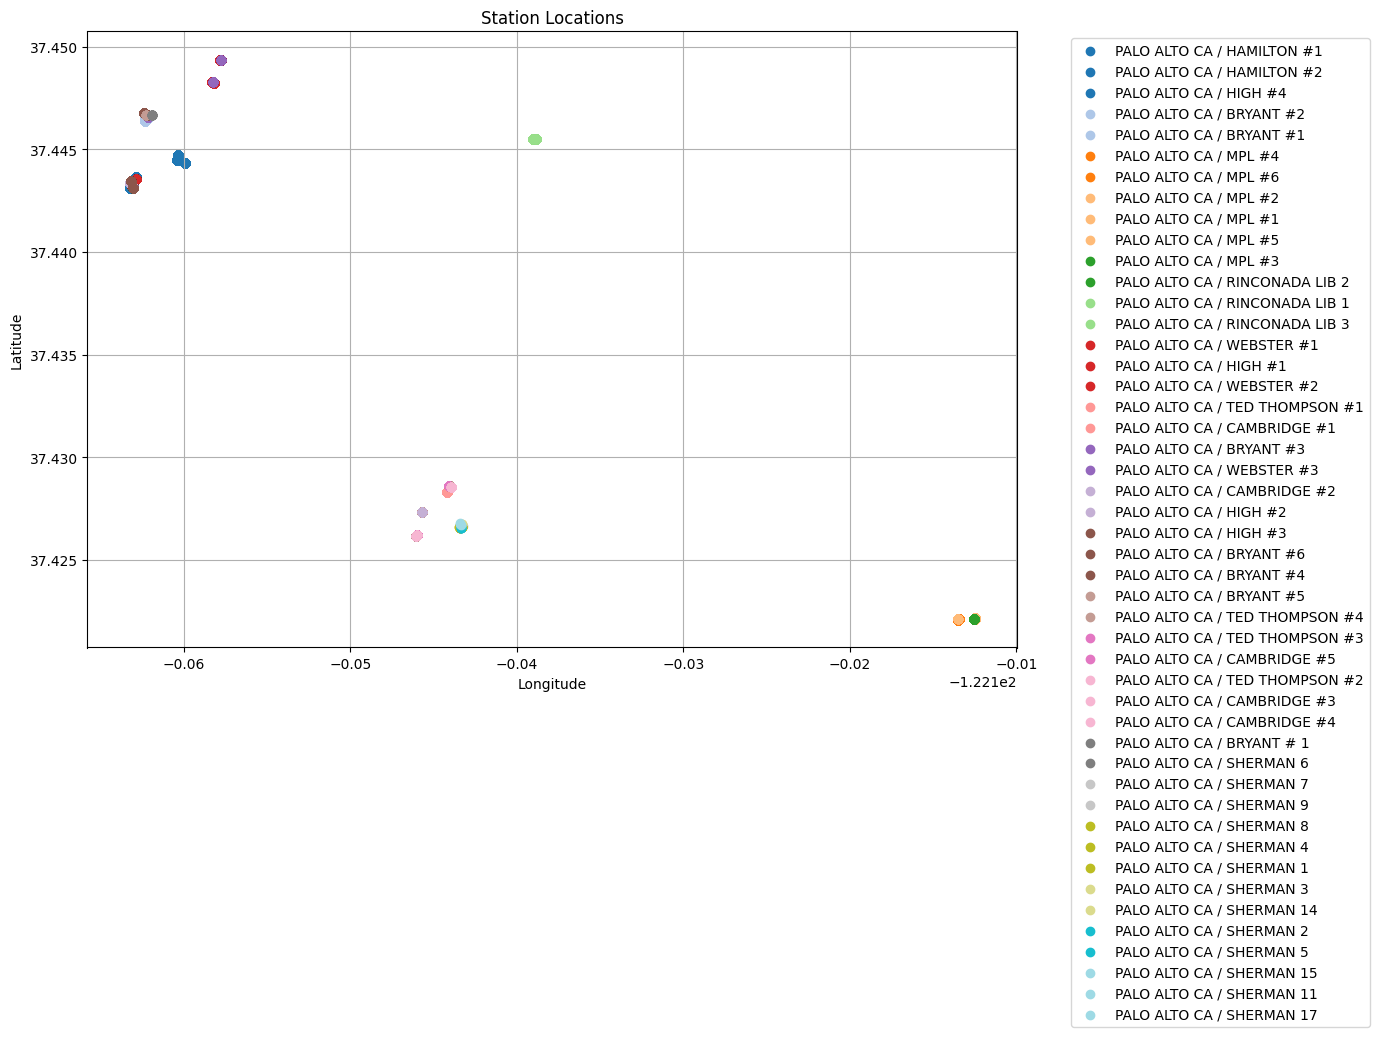

In [117]:
# Generate unique colors for each station
stations = d['Station Name'].unique()  # Get unique station names
num_stations = len(stations)  # Count number of stations
colors = cm.get_cmap('tab20', num_stations)  # Use a colormap (e.g., 'tab20')

# Map station names to colors
color_map = {station: colors(i) for i, station in enumerate(stations)}
d['color'] = d['Station Name'].map(color_map)

# Plot longitude vs latitude
plt.figure(figsize=(12, 8))
for station in stations:
    station_data = d[d['Station Name'] == station]
    plt.scatter(station_data['Longitude'], station_data['Latitude'], 
                color=color_map[station], label=station)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Station Locations')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.grid()
plt.show()


In [118]:
unique_coords_per_station = d.groupby('Station Name')[['Longitude', 'Latitude']].apply(
    lambda group: group.drop_duplicates().values.tolist()
)

mult_coord = []
# Convert the result to a DataFrame for easier viewing
unique_coords_df = unique_coords_per_station.reset_index(name='coordinates')
for i in range(len(unique_coords_df)):
    if len(unique_coords_df['coordinates'][i]) > 1:
        print(f"Station: {unique_coords_df['Station Name'][i]}: {unique_coords_df['coordinates'][i]}")
        mult_coord.append(unique_coords_df['Station Name'][i])

Station: PALO ALTO CA / BRYANT #1: [[-122.162331, 37.446373], [-122.162308, 37.446613], [-122.161919, 37.446651]]
Station: PALO ALTO CA / BRYANT #2: [[-122.162331, 37.446373], [-122.16214, 37.44651], [-122.162308, 37.446613]]
Station: PALO ALTO CA / CAMBRIDGE #1: [[-122.145676, 37.427349], [-122.146065, 37.426155]]
Station: PALO ALTO CA / CAMBRIDGE #2: [[-122.145699, 37.42733], [-122.146065, 37.426182]]
Station: PALO ALTO CA / HAMILTON #1: [[-122.160309, 37.444572], [-122.16037, 37.444489]]
Station: PALO ALTO CA / HAMILTON #2: [[-122.160263, 37.444607], [-122.159904, 37.444359], [-122.160324, 37.444706]]
Station: PALO ALTO CA / HIGH #1: [[-122.162849, 37.443558], [-122.163078, 37.443211]]
Station: PALO ALTO CA / HIGH #2: [[-122.163017, 37.443146], [-122.163231, 37.443344]]
Station: PALO ALTO CA / HIGH #3: [[-122.163033, 37.443127], [-122.163139, 37.443443]]
Station: PALO ALTO CA / HIGH #4: [[-122.16288, 37.443676], [-122.163048, 37.443378], [-122.163239, 37.443138]]
Station: PALO ALTO 

In [119]:
# Group by longitude and latitude and count unique station names
shared_coords = d.groupby(['Longitude', 'Latitude'])['Station Name'].nunique()

# Filter coordinates used by multiple stations
shared_coords = shared_coords[shared_coords > 1]

shared_coords_df = d[d.set_index(['Longitude', 'Latitude']).index.isin(shared_coords.index)]

# Group and display stations sharing the same coordinates
stations_sharing_coords = shared_coords_df.groupby(['Longitude', 'Latitude'])['Station Name'].unique()

print("Coordinates shared by multiple stations:")
print(shared_coords)

print("Stations sharing the same coordinates:")
print(stations_sharing_coords)

Coordinates shared by multiple stations:
Longitude    Latitude 
-122.162331  37.446373    2
-122.162308  37.446613    2
-122.161919  37.446651    2
-122.157768  37.449348    2
Name: Station Name, dtype: int64
Stations sharing the same coordinates:
Longitude    Latitude 
-122.162331  37.446373    [PALO ALTO CA / BRYANT #2, PALO ALTO CA / BRYA...
-122.162308  37.446613    [PALO ALTO CA / BRYANT #1, PALO ALTO CA / BRYA...
-122.161919  37.446651    [PALO ALTO CA / BRYANT #1, PALO ALTO CA / BRYA...
-122.157768  37.449348    [PALO ALTO CA / WEBSTER #1, PALO ALTO CA / WEB...
Name: Station Name, dtype: object


In [120]:
d.drop('color', axis=1, inplace=True)
d.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


## Handling missing values, dates and data types

#### Converting dates to datetime

In [121]:
#Converting to datetime
d['Start Date'] = pd.to_datetime(d['Start Date'])  #Complete date and time
d['End Date'] = pd.to_datetime(d['End Date'], errors='coerce')  #Complete date and time
d['Transaction Date (Pacific Time)'] = pd.to_datetime(d['Transaction Date (Pacific Time)'], errors='coerce') #Complete date and time
d['Total Duration (hh:mm:ss)'] = pd.to_datetime(d['Total Duration (hh:mm:ss)'], format='%H:%M:%S', errors = 'coerce').dt.time #Only time
d['Charging Time (hh:mm:ss)'] = pd.to_datetime(d['Charging Time (hh:mm:ss)'], format='%H:%M:%S').dt.time #Only time
d.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,2011-07-29 23:20:00,03:03:32,01:54:03,...,-122.160309,USD,0.0,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2011-07-30 00:02:00,00:02:06,00:01:54,...,-122.160309,USD,0.0,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,2011-07-30 12:34:00,04:17:32,04:17:28,...,-122.160309,USD,0.0,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,2011-07-30 16:55:00,02:03:24,02:02:58,...,-122.160309,USD,0.0,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,2011-07-30 20:03:00,01:11:24,00:43:54,...,-122.160309,USD,0.0,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN


In [122]:
d['Energy (kWh)']

0          6.249457
1          0.106588
2         14.951777
3          7.159643
4          1.957765
            ...    
259410     1.841000
259411    12.744000
259412    29.665000
259413    11.976000
259414     1.571000
Name: Energy (kWh), Length: 259415, dtype: float64

In [123]:
#Converting Charging Time to hours
d['Charging Time (hours)'] = d['Charging Time (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)
d['Total Duration (hours)'] = d['Total Duration (hh:mm:ss)'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

#Converting into hourly energy use
d['Energy (kWh/h)'] = d['Energy (kWh)']/d['Charging Time (hours)']

# Variable for day of week
d['Day of week'] = d['Start Date'].dt.dayofweek

d.head()

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,2011-07-29 23:20:00,03:03:32,01:54:03,...,3,95124.0,3284.0,NaN,NaN,NaN,1.900833,3.058889,3.287746,4
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2011-07-30 00:02:00,00:02:06,00:01:54,...,4,94301.0,4169.0,NaN,NaN,NaN,0.031667,0.035000,3.365937,5
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,2011-07-30 12:34:00,04:17:32,04:17:28,...,5,94301.0,4169.0,NaN,NaN,NaN,4.291111,4.292222,3.484360,5
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,2011-07-30 16:55:00,02:03:24,02:02:58,...,6,94302.0,2545.0,NaN,NaN,NaN,2.049444,2.056667,3.493456,5
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,2011-07-30 20:03:00,01:11:24,00:43:54,...,7,94043.0,3765.0,NaN,NaN,NaN,0.731667,1.190000,2.675761,5


In [124]:
#Removing missing values by row
def remove_missing_values(df):
    missing_cols = df.isnull().sum()
    df = df.drop(missing_cols[missing_cols > 8000].index, axis=1)
    print("Columns with more than 8000 missing values have been removed", missing_cols[missing_cols > 8000].index)
    df = df.dropna(axis=0)
    return df

df = d.copy()
df = remove_missing_values(df)
df.info()

Columns with more than 8000 missing values have been removed Index(['EVSE ID', 'Driver Postal Code', 'County', 'System S/N',
       'Model Number'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 249851 entries, 0 to 259414
Data columns (total 32 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Station Name                     249851 non-null  object        
 1   MAC Address                      249851 non-null  object        
 2   Org Name                         249851 non-null  object        
 3   Start Date                       249851 non-null  datetime64[ns]
 4   Start Time Zone                  249851 non-null  object        
 5   End Date                         249851 non-null  datetime64[ns]
 6   End Time Zone                    249851 non-null  object        
 7   Transaction Date (Pacific Time)  249851 non-null  datetime64[ns]
 8   Total Duration (hh

In [125]:
check_missing_values(df)

Missing values per column:
 Series([], dtype: int64)

Total missing values: 0
Total number of rows with missing values: 0
Total number of columns with missing values: 0


In [126]:
df = df.set_index('User ID')
df

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
3284.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-29 20:17:00,PDT,2011-07-29 23:20:00,PDT,2011-07-29 23:20:00,03:03:32,01:54:03,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,3,1.900833,3.058889,3.287746,4
4169.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 00:00:00,PDT,2011-07-30 00:02:00,PDT,2011-07-30 00:02:00,00:02:06,00:01:54,...,37.444572,-122.160309,USD,0.00,Customer,4,0.031667,0.035000,3.365937,5
4169.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 08:16:00,PDT,2011-07-30 12:34:00,PDT,2011-07-30 12:34:00,04:17:32,04:17:28,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,5,4.291111,4.292222,3.484360,5
2545.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 14:51:00,PDT,2011-07-30 16:55:00,PDT,2011-07-30 16:55:00,02:03:24,02:02:58,...,37.444572,-122.160309,USD,0.00,Customer,6,2.049444,2.056667,3.493456,5
3765.0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,2011-07-30 18:51:00,PDT,2011-07-30 20:03:00,PDT,2011-07-30 20:03:00,01:11:24,00:43:54,...,37.444572,-122.160309,USD,0.00,Plug Out at Vehicle,7,0.731667,1.190000,2.675761,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024201,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,2020-12-31 16:39:00,PST,2020-12-31 17:14:00,PST,2020-12-31 17:16:00,00:35:44,00:35:18,...,37.428623,-122.144043,USD,0.42,Plug Out at Vehicle,2369,0.588333,0.595556,3.129178,3
242661,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,2020-12-31 16:48:00,PST,2020-12-31 20:31:00,PST,2020-12-31 20:32:00,03:43:01,02:14:04,...,37.448284,-122.158272,USD,4.69,Plug Out at Vehicle,7255,2.234444,3.716944,5.703431,3
449995,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,2020-12-31 17:28:00,PST,2021-01-01 10:56:00,PST,2021-01-01 10:57:00,17:28:14,05:08:12,...,37.422104,-122.113510,USD,6.82,Plug Out at Vehicle,455,5.136667,17.470556,5.775146,3


In [127]:
#Label Encoding
def label_encoding(df):
    le = LabelEncoder()
    for col in df.columns:
        # Check if column is of type 'object' and contains only strings
        if df[col].dtype == 'object' and all(isinstance(val, str) for val in df[col].dropna()):
            print(f"Encoding {col}")
            df[col] = le.fit_transform(df[col])
        else:
            pass
    return df

df = label_encoding(df)
df.head()

Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone
Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Latitude,Longitude,Currency,Fee,Ended By,Plug In Event Id,Charging Time (hours),Total Duration (hours),Energy (kWh/h),Day of week
User ID,,,,,,,,,,,,,,,,,,,,,
3284.0,12,25,0,2011-07-29 20:17:00,0,2011-07-29 23:20:00,0,2011-07-29 23:20:00,03:03:32,01:54:03,...,37.444572,-122.160309,3,0.0,10,3,1.900833,3.058889,3.287746,4
4169.0,12,25,0,2011-07-30 00:00:00,0,2011-07-30 00:02:00,0,2011-07-30 00:02:00,00:02:06,00:01:54,...,37.444572,-122.160309,3,0.0,1,4,0.031667,0.035000,3.365937,5
4169.0,12,25,0,2011-07-30 08:16:00,0,2011-07-30 12:34:00,0,2011-07-30 12:34:00,04:17:32,04:17:28,...,37.444572,-122.160309,3,0.0,10,5,4.291111,4.292222,3.484360,5
2545.0,12,25,0,2011-07-30 14:51:00,0,2011-07-30 16:55:00,0,2011-07-30 16:55:00,02:03:24,02:02:58,...,37.444572,-122.160309,3,0.0,1,6,2.049444,2.056667,3.493456,5
3765.0,12,25,0,2011-07-30 18:51:00,0,2011-07-30 20:03:00,0,2011-07-30 20:03:00,01:11:24,00:43:54,...,37.444572,-122.160309,3,0.0,10,7,0.731667,1.190000,2.675761,5


In [128]:
d = remove_missing_values(d)
d = label_encoding(d)


Columns with more than 8000 missing values have been removed Index(['EVSE ID', 'Driver Postal Code', 'County', 'System S/N',
       'Model Number'],
      dtype='object')
Encoding Station Name
Encoding MAC Address
Encoding Org Name
Encoding Start Time Zone
Encoding End Time Zone
Encoding Port Type
Encoding Plug Type
Encoding Address 1
Encoding City
Encoding State/Province
Encoding Country
Encoding Currency
Encoding Ended By


In [129]:
unique_values(d)

Station Name has 47 unique values
MAC Address has 83 unique values
Org Name has 2 unique values
Start Date has 236090 unique values
Start Time Zone has 3 unique values
End Date has 235529 unique values
End Time Zone has 3 unique values
Transaction Date (Pacific Time) has 232571 unique values
Total Duration (hh:mm:ss) has 30418 unique values
Charging Time (hh:mm:ss) has 22160 unique values
Energy (kWh) has 113087 unique values
GHG Savings (kg) has 15260 unique values
Gasoline Savings (gallons) has 6212 unique values
Port Type has 2 unique values
Port Number has 2 unique values
Plug Type has 2 unique values
Address 1 has 20 unique values
City has 1 unique values
State/Province has 1 unique values
Postal Code has 3 unique values
Country has 1 unique values
Latitude has 62 unique values
Longitude has 64 unique values
Currency has 4 unique values
Fee has 1750 unique values
Ended By has 14 unique values
Plug In Event Id has 35887 unique values
User ID has 27593 unique values
Charging Time (h

## Data visualization

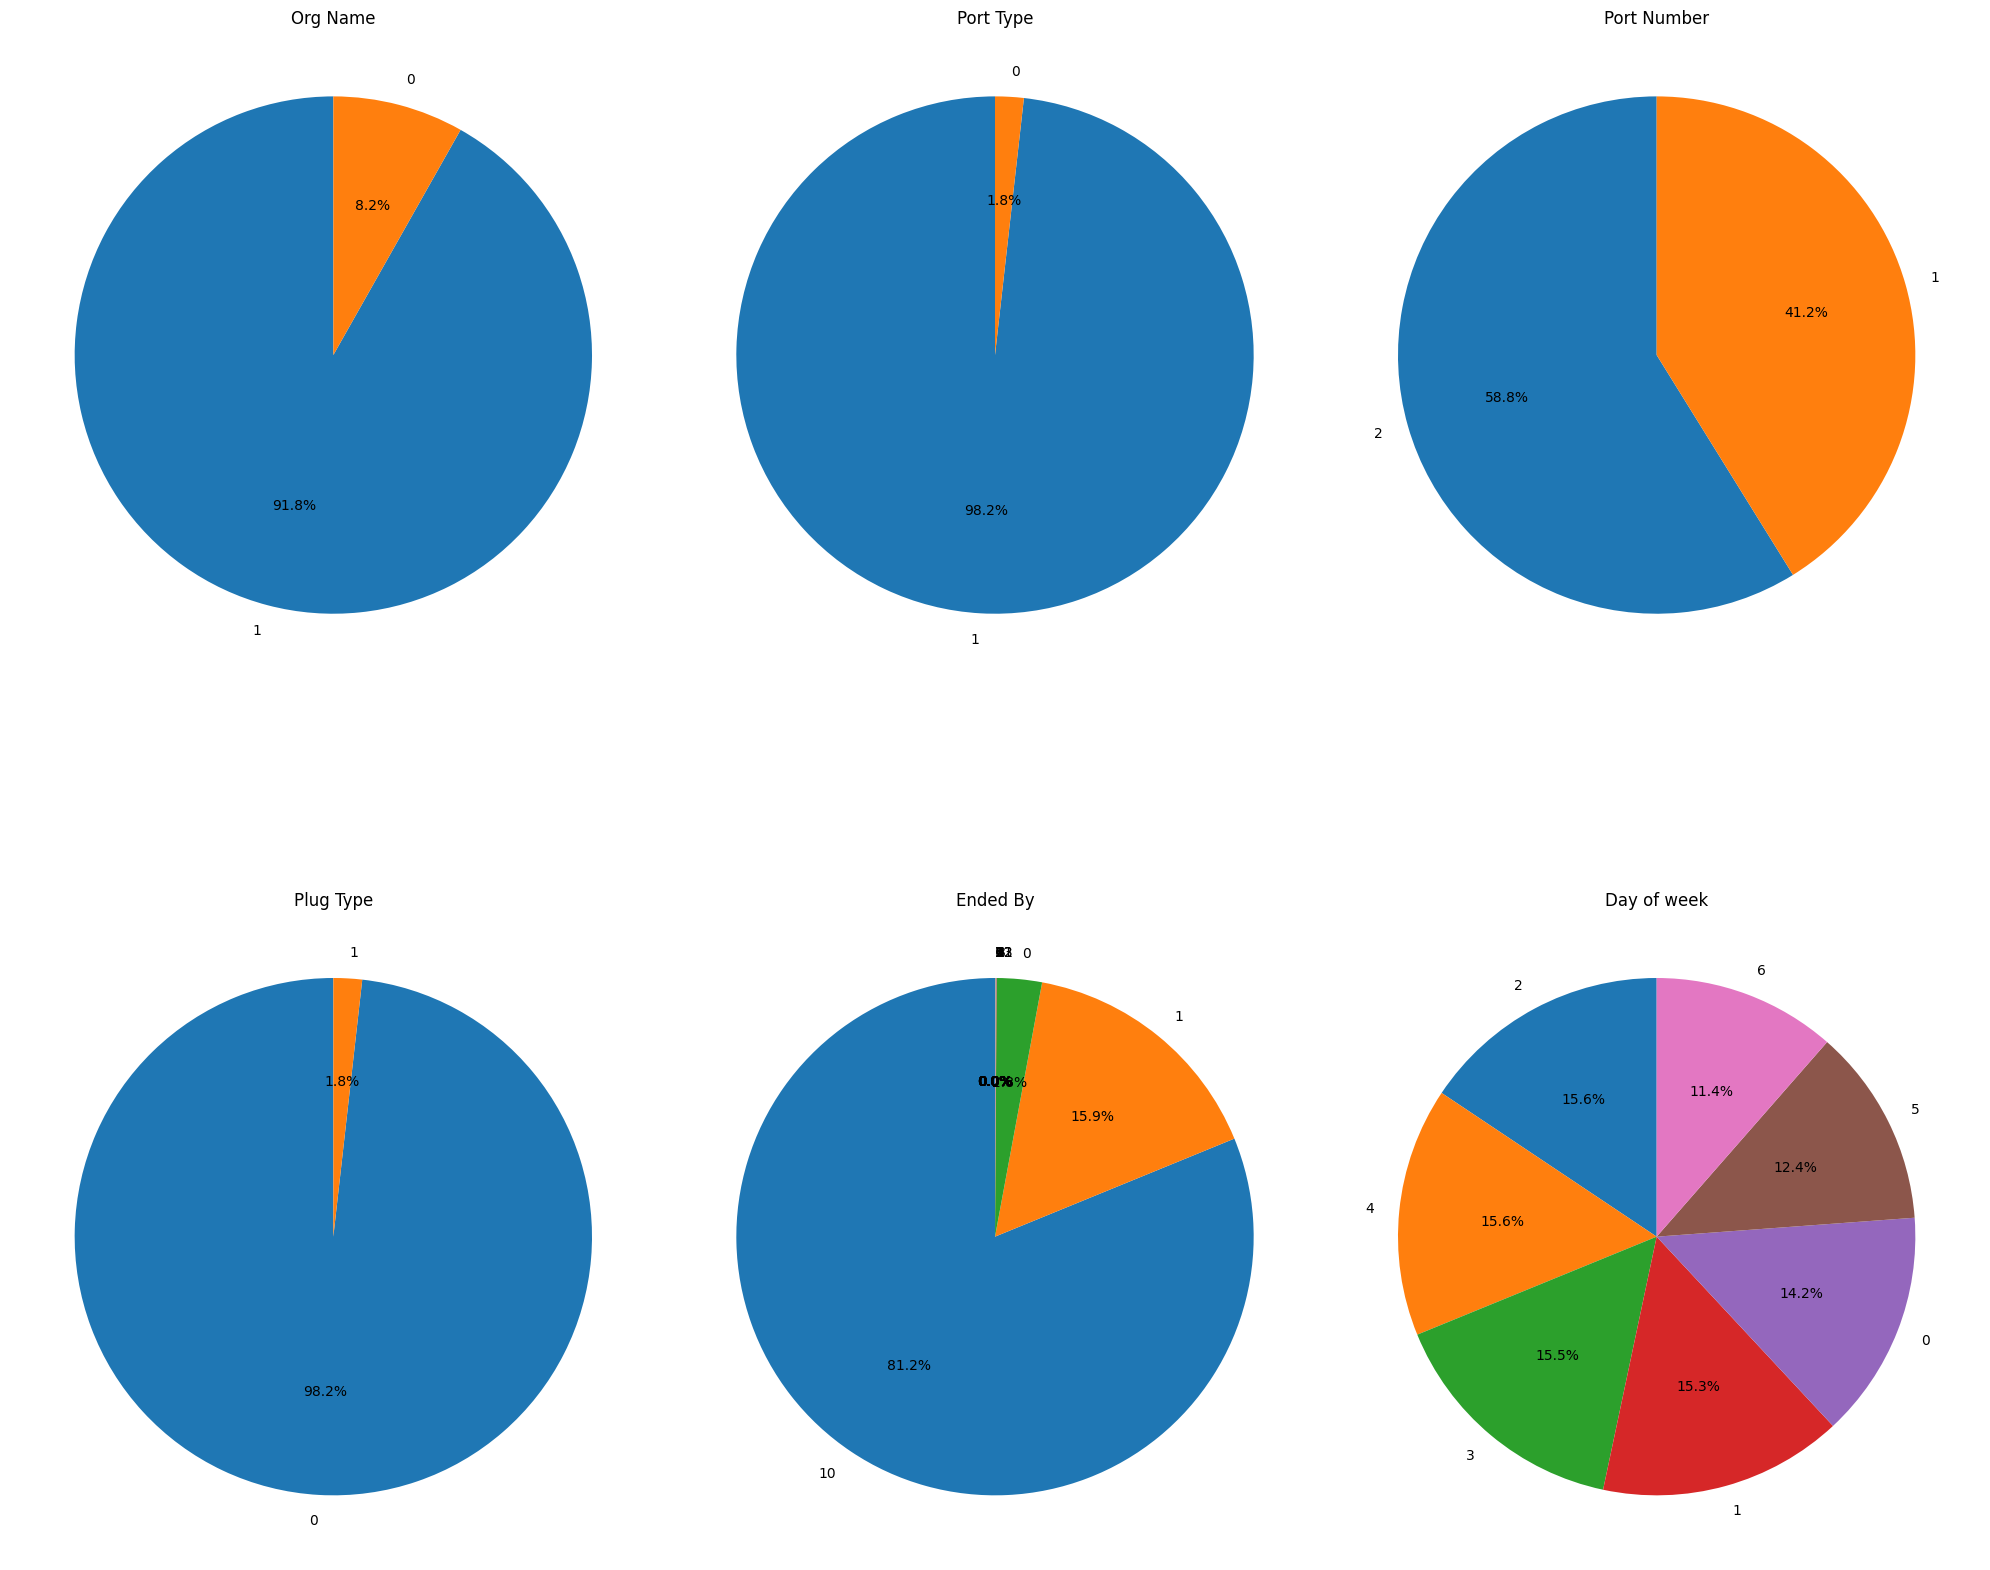

In [130]:
# Pie plots for distribution of different metrics
to_plot = [ 'Org Name', 'Port Type', 'Port Number', 'Plug Type','Ended By', 'Day of week']

fig, axes = plt.subplots(2, 3, figsize=(20, 20))
axes = axes.flatten()
for i, col in enumerate(to_plot):
    d[col].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(col)
    axes[i].set_ylabel('')
plt.tight_layout()
plt.show()


IndexError: index 9 is out of bounds for axis 0 with size 9

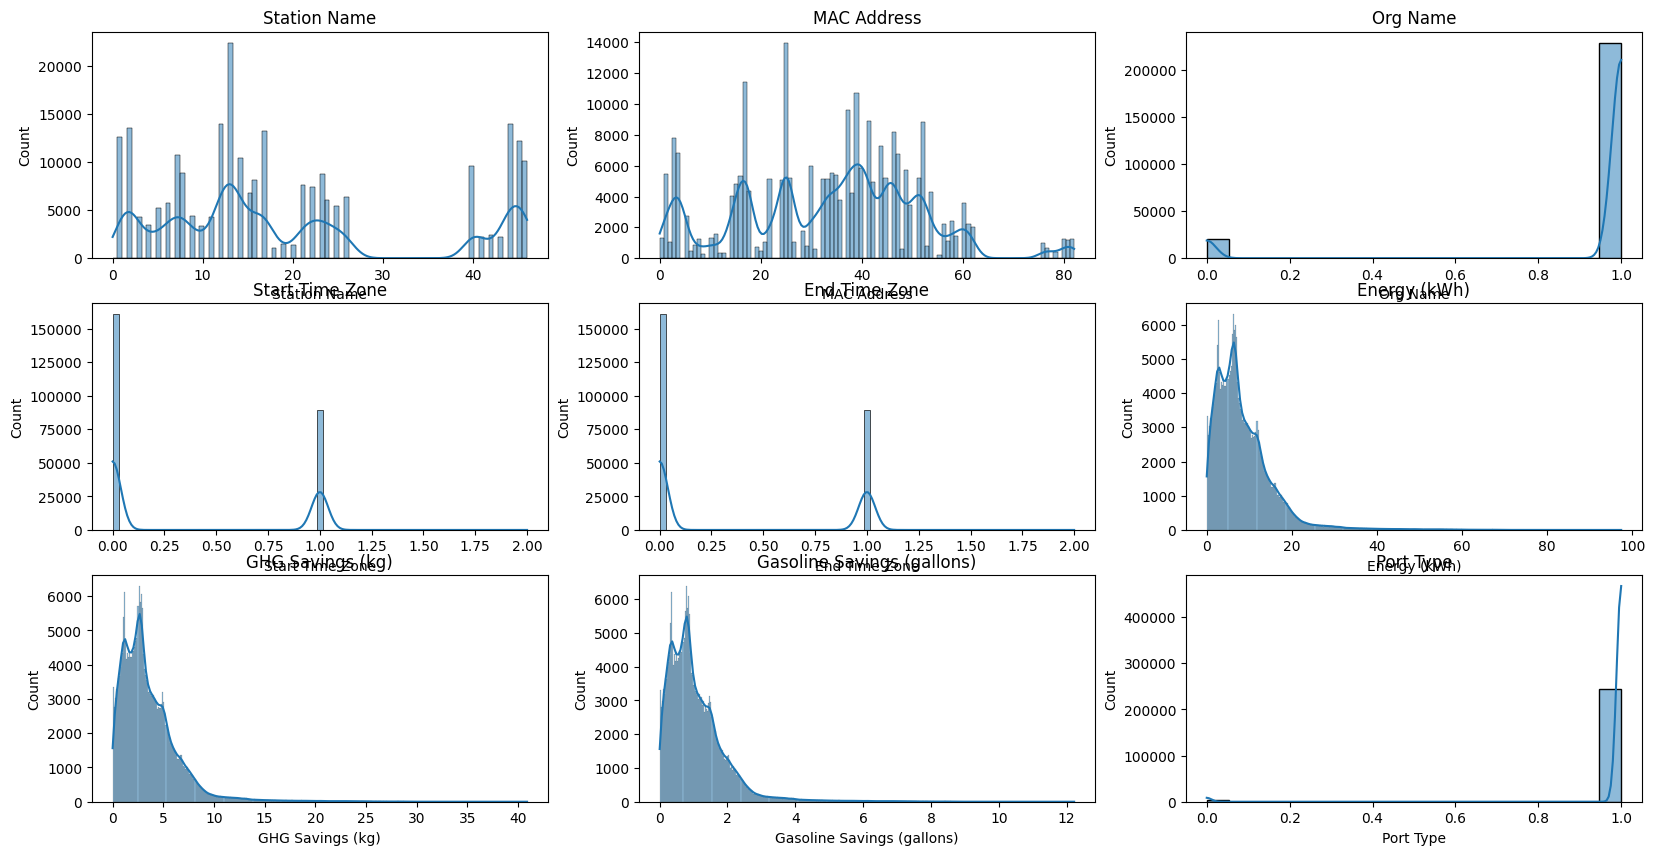

In [131]:
#Plotting distributions of the numerical variables
fig, axes = plt.subplots(3, 3, figsize=(20, 10))
axes = axes.flatten()
for i, col in enumerate(d.select_dtypes(include='number').columns):
    sns.histplot(d[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


## Grouping station data by charging time and energy consumption

In [133]:
d = d.set_index('Start Date')

In [134]:
d['date'] = d.index.date
d['hour'] = d.index.hour

hourly_energy = d.groupby(['Station Name', 'date', 'hour'])['Energy (kWh)'].sum().reset_index()

# Pivot table: Rows -> Station Name, Columns -> Hour, Values -> Energy (kWh)
user_hourly = hourly_energy.pivot_table(index='Station Name', columns='hour', values='Energy (kWh)', fill_value=0)

In [136]:
user_hourly

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.241648,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.828619,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,8.962293,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967


In [135]:
print(user_hourly)

hour                 0          1          2          3          4   \
Station Name                                                          
0              2.155000   0.000000   0.000000   0.000000   0.000000   
1             15.968664  22.920030  17.281937  19.273235   8.977538   
2             12.005408  12.962444   9.358428  17.164327   9.626071   
3             24.623062  14.947686   9.709064   0.000000   4.979555   
4              9.296000  19.965000  33.159000   0.000000   0.000000   
5             18.718667   0.000000  25.019500   0.000000   0.000000   
6             22.538167  15.949000   0.000000  23.027000   5.014833   
7             13.862013  16.623269   9.093633   7.183020   2.767345   
8             16.819531   2.131471  16.385500  10.406492   2.924780   
9              9.951500   0.000000   0.000000   9.823000  13.363000   
10             7.632000   5.433000   0.000000  13.638000   6.257500   
11             6.964091  10.573667   9.246250  12.664000  10.351500   
12    

In [18]:
user_hourly.columns = [f"{col}" for col in user_hourly.columns]
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.846299,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.773904,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,8.880367,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,10.269243,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,10.380880,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,10.241648,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,8.828619,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,8.962293,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967


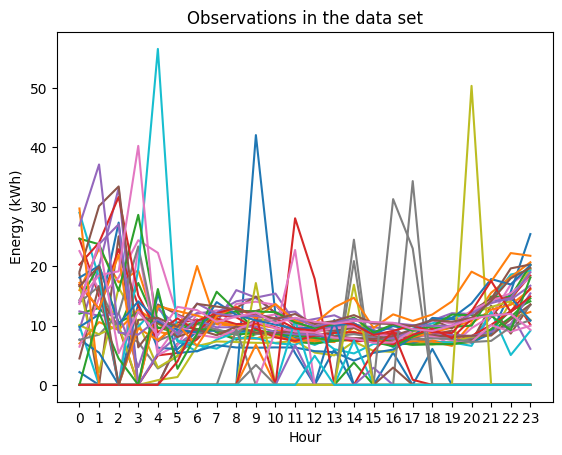

In [19]:
plt.plot(user_hourly.T)
plt.title('Observations in the data set')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh)')
plt.show()

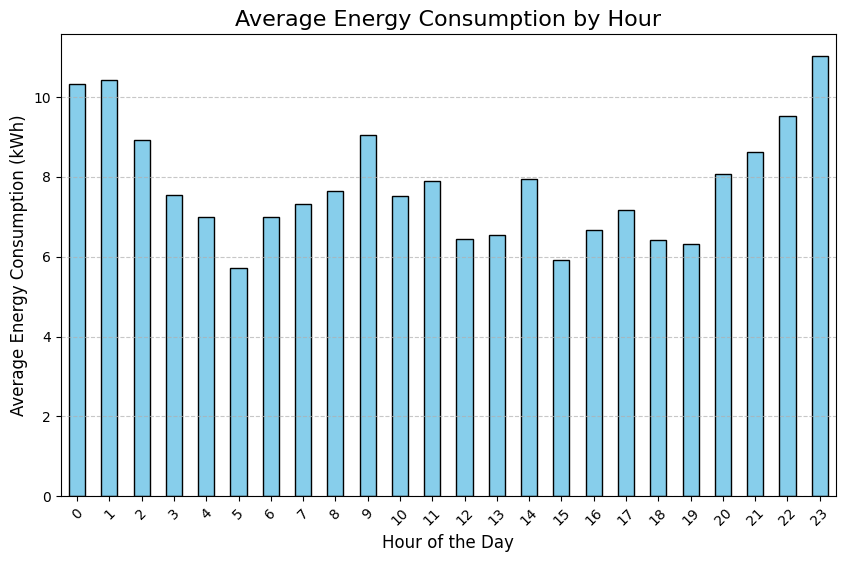

In [20]:
# Calculate the average energy consumption per hour across all users
hourly_avg_energy = user_hourly.mean(axis=0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
hourly_avg_energy.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Energy Consumption by Hour", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Average Energy Consumption (kWh)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


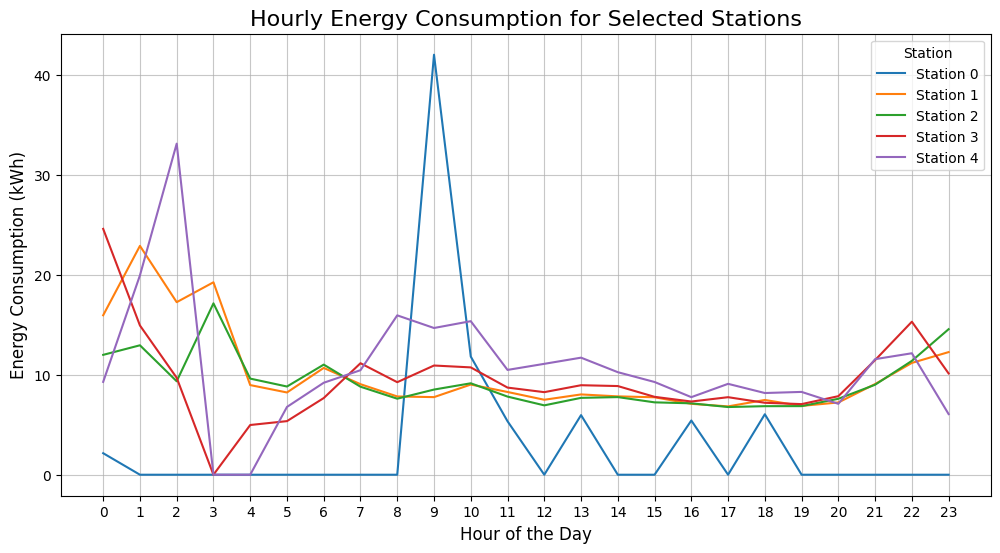

In [21]:
# Select a subset of users (e.g., first 5 users)
subset_station = user_hourly.head(5)

# Plot energy consumption for selected users
plt.figure(figsize=(12, 6))
for station_name in subset_station.index:
    plt.plot(subset_station.columns, subset_station.loc[station_name], label=f"Station {station_name}")

plt.title("Hourly Energy Consumption for Selected Stations", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Energy Consumption (kWh)", fontsize=12)
plt.legend(title="Station")
plt.grid(alpha=0.7)
plt.show()


## Clustering

In [22]:
scaler = MinMaxScaler()
normalized_user_hourly = scaler.fit_transform(user_hourly)

# Convert back to DataFrame
normalized_user_hourly = pd.DataFrame(normalized_user_hourly, 
                                       index=user_hourly.index, 
                                       columns=user_hourly.columns)

In [23]:
kmeans = KMeans(n_clusters=8)
clusters = kmeans.fit_predict(normalized_user_hourly)

# Add cluster labels to the DataFrame
user_hourly['Cluster'] = clusters

# View the resulting DataFrame
print(user_hourly.head())

                      0          1          2          3         4         5  \
Station Name                                                                   
0              2.155000   0.000000   0.000000   0.000000  0.000000  0.000000   
1             15.968664  22.920030  17.281937  19.273235  8.977538  8.237422   
2             12.005408  12.962444   9.358428  17.164327  9.626071  8.833433   
3             24.623062  14.947686   9.709064   0.000000  4.979555  5.367642   
4              9.296000  19.965000  33.159000   0.000000  0.000000  6.788706   

                      6          7          8          9  ...        15  \
Station Name                                              ...             
0              0.000000   0.000000   0.000000  42.064000  ...  0.000000   
1             10.695799   9.067433   7.837912   7.772147  ...  7.756942   
2             11.026872   8.814730   7.614132   8.528849  ...  7.247889   
3              7.677478  11.166891   9.267048  10.936971  ...  7

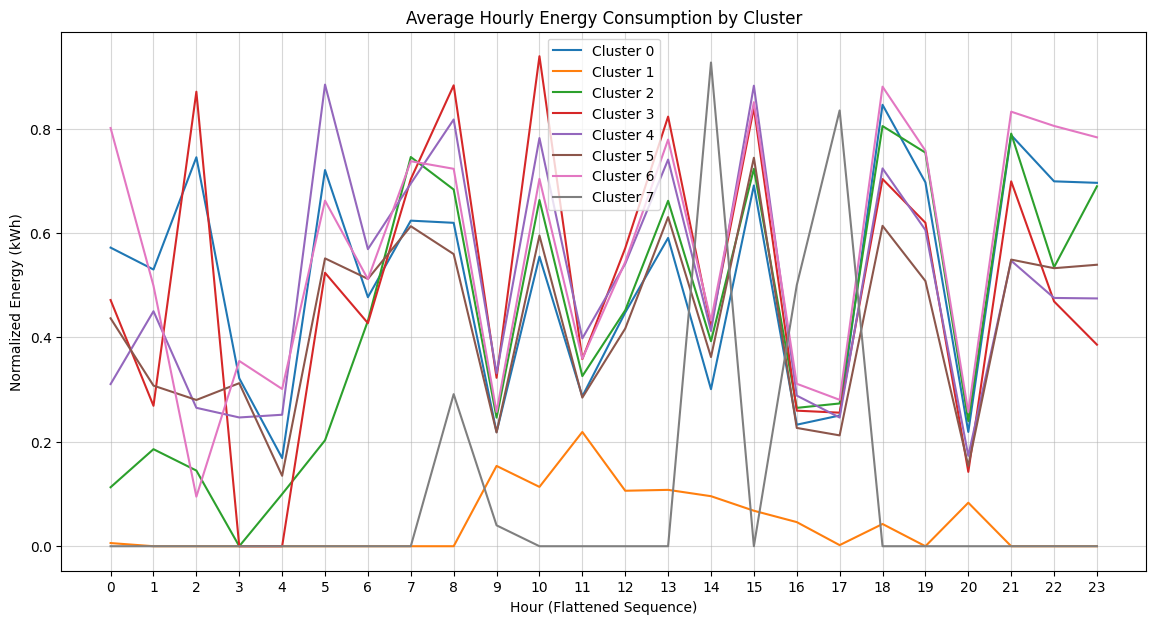

In [24]:
cluster_hourly_avg = normalized_user_hourly.groupby(user_hourly['Cluster']).mean()

# Plot the average usage patterns per cluster
plt.figure(figsize=(14, 7))
for cluster_id in cluster_hourly_avg.index:
    plt.plot(cluster_hourly_avg.columns, cluster_hourly_avg.loc[cluster_id], label=f"Cluster {cluster_id}")

plt.legend()
plt.title("Average Hourly Energy Consumption by Cluster")
plt.xlabel("Hour (Flattened Sequence)")
plt.ylabel("Normalized Energy (kWh)")
plt.grid(alpha=0.5)
plt.show()

In [25]:
user_hourly

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Cluster
Station Name,,,,,,,,,,,,,,,,,,,,,
0,2.155000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.064000,...,0.000000,5.430000,0.000000,6.056500,0.000000,0.000000,0.000000,0.000000,0.000000,1
1,15.968664,22.920030,17.281937,19.273235,8.977538,8.237422,10.695799,9.067433,7.837912,7.772147,...,7.756942,7.099480,6.844059,7.485997,6.892765,7.236293,9.083855,11.198523,12.281231,5
2,12.005408,12.962444,9.358428,17.164327,9.626071,8.833433,11.026872,8.814730,7.614132,8.528849,...,7.247889,7.150788,6.778468,6.864802,6.870344,7.605781,9.012788,11.404069,14.575329,5
3,24.623062,14.947686,9.709064,0.000000,4.979555,5.367642,7.677478,11.166891,9.267048,10.936971,...,7.800064,7.331116,7.764661,7.204926,7.071632,7.867320,11.480586,15.324031,10.140800,5
4,9.296000,19.965000,33.159000,0.000000,0.000000,6.788706,9.211122,10.468636,15.960627,14.694743,...,9.287012,7.769357,9.102062,8.182677,8.293665,7.102169,11.575231,12.165000,6.071000,3
5,18.718667,0.000000,25.019500,0.000000,0.000000,6.980000,7.897179,11.588824,12.217459,12.444212,...,8.482993,8.475506,8.453668,8.490078,9.135644,7.238906,13.340155,8.648737,13.538000,3
6,22.538167,15.949000,0.000000,23.027000,5.014833,6.742611,11.949845,12.557527,12.119712,11.264811,...,8.223371,9.023653,8.317387,8.458419,6.678081,9.556213,11.604959,16.915061,19.481556,6
7,13.862013,16.623269,9.093633,7.183020,2.767345,4.828301,8.461780,10.464258,10.190193,8.582207,...,7.718795,7.753066,7.266688,7.122498,7.275176,7.873886,9.370124,9.831519,13.435983,5
8,16.819531,2.131471,16.385500,10.406492,2.924780,4.898910,10.305468,11.064187,9.619833,7.772873,...,7.718418,6.739262,7.238289,6.797411,7.299979,8.134108,8.447836,13.998906,10.932967,5


In [26]:
user_hourly = user_hourly.reset_index()

In [27]:
merged = pd.merge(d[['User ID','Station Name','Transaction Date (Pacific Time)', 'Charging Time (hours)', 'Energy (kWh/h)', 'Longitude', 'Latitude']], user_hourly[['Station Name', 'Cluster']], on='Station Name')
merged

,User ID,Station Name,Transaction Date (Pacific Time),Charging Time (hours),Energy (kWh/h),Longitude,Latitude,Cluster
0,3284.0,12,2011-07-29 23:20:00,1.900833,3.287746,-122.160309,37.444572,5
1,4169.0,12,2011-07-30 00:02:00,0.031667,3.365937,-122.160309,37.444572,5
2,4169.0,12,2011-07-30 12:34:00,4.291111,3.484360,-122.160309,37.444572,5
3,2545.0,12,2011-07-30 16:55:00,2.049444,3.493456,-122.160309,37.444572,5
4,3765.0,12,2011-07-30 20:03:00,0.731667,2.675761,-122.160309,37.444572,5
...,...,...,...,...,...,...,...,...
249846,2024201,42,2020-12-31 17:16:00,0.588333,3.129178,-122.144043,37.428623,2
249847,242661,44,2020-12-31 20:32:00,2.234444,5.703431,-122.158272,37.448284,6
249848,449995,21,2021-01-01 10:57:00,5.136667,5.775146,-122.113510,37.422104,0
249849,804075,44,2020-12-31 21:56:00,3.895000,3.074711,-122.158272,37.448284,6


In [28]:
merged.set_index('Transaction Date (Pacific Time)', inplace=True)

In [29]:
merged['day_of_week'] = merged.index.dayofweek
merged.reset_index(inplace=True)
merged.drop('Transaction Date (Pacific Time)', axis=1, inplace=True)
merged

,User ID,Station Name,Charging Time (hours),Energy (kWh/h),Longitude,Latitude,Cluster,day_of_week
0,3284.0,12,1.900833,3.287746,-122.160309,37.444572,5,4
1,4169.0,12,0.031667,3.365937,-122.160309,37.444572,5,5
2,4169.0,12,4.291111,3.484360,-122.160309,37.444572,5,5
3,2545.0,12,2.049444,3.493456,-122.160309,37.444572,5,5
4,3765.0,12,0.731667,2.675761,-122.160309,37.444572,5,5
...,...,...,...,...,...,...,...,...
249846,2024201,42,0.588333,3.129178,-122.144043,37.428623,2,3
249847,242661,44,2.234444,5.703431,-122.158272,37.448284,6,3
249848,449995,21,5.136667,5.775146,-122.113510,37.422104,0,4
249849,804075,44,3.895000,3.074711,-122.158272,37.448284,6,3


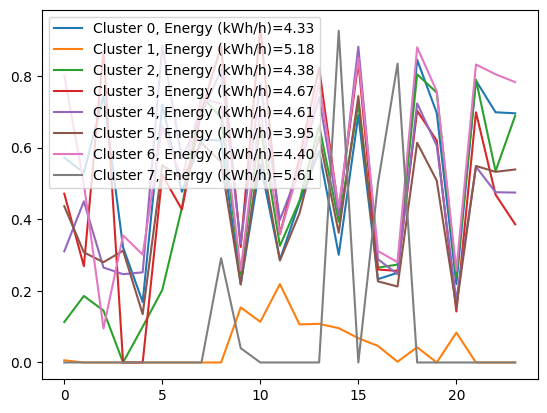

In [30]:
x=np.arange(0,user_hourly.shape[1]-2)
for i in range(8):
    plt.plot(x, kmeans.cluster_centers_[i], 
             label="Cluster %d, Energy (kWh/h)=%.2f"%(i, np.mean(merged[merged.Cluster==i]['Energy (kWh/h)'])))
plt.legend();

In [31]:
#Prediction model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = merged.drop(['User ID', 'Energy (kWh/h)', 'Cluster'], axis=1)
y = merged['Energy (kWh/h)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 2.128138332304905


## Data Analysis and Visualization

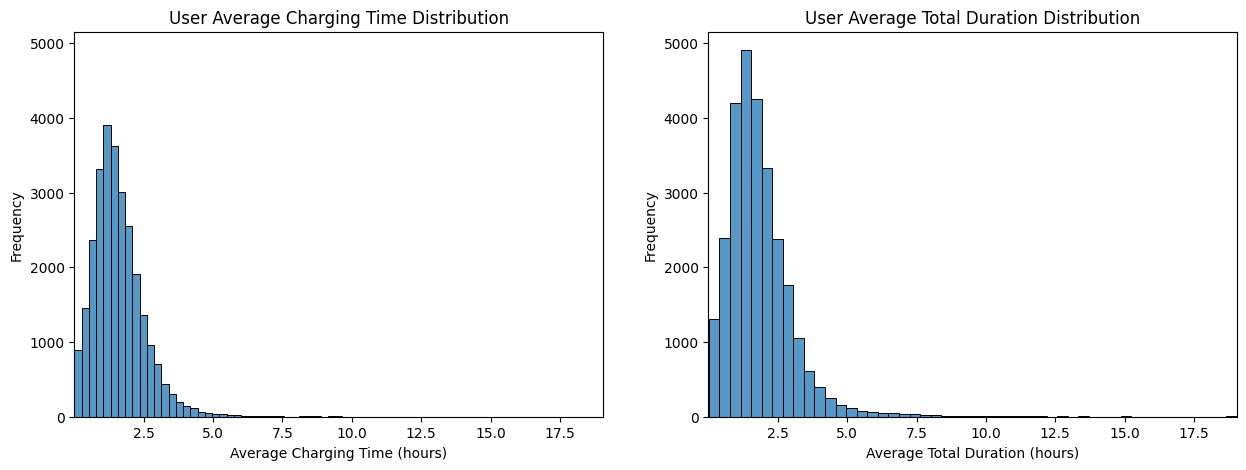

In [32]:
user_charging_patterns = df.groupby(df.index)['Charging Time (hours)'].mean()
user_duration_patterns = df.groupby(df.index)['Total Duration (hours)'].mean()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(user_charging_patterns, bins=50, ax=axs[0])
axs[0].set_title('User Average Charging Time Distribution')
axs[0].set_xlabel('Average Charging Time (hours)')
axs[0].set_ylabel('Frequency')

sns.histplot(user_duration_patterns, bins=50, ax=axs[1])
axs[1].set_title('User Average Total Duration Distribution')
axs[1].set_xlabel('Average Total Duration (hours)')
axs[1].set_ylabel('Frequency')

x_min = min(user_charging_patterns.min(), user_duration_patterns.min())
x_max = max(user_charging_patterns.max(), user_duration_patterns.max())
y_min, y_max = 0, max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.show()


In [33]:
df['Total Duration (minutes)']

KeyError: 'Total Duration (minutes)'

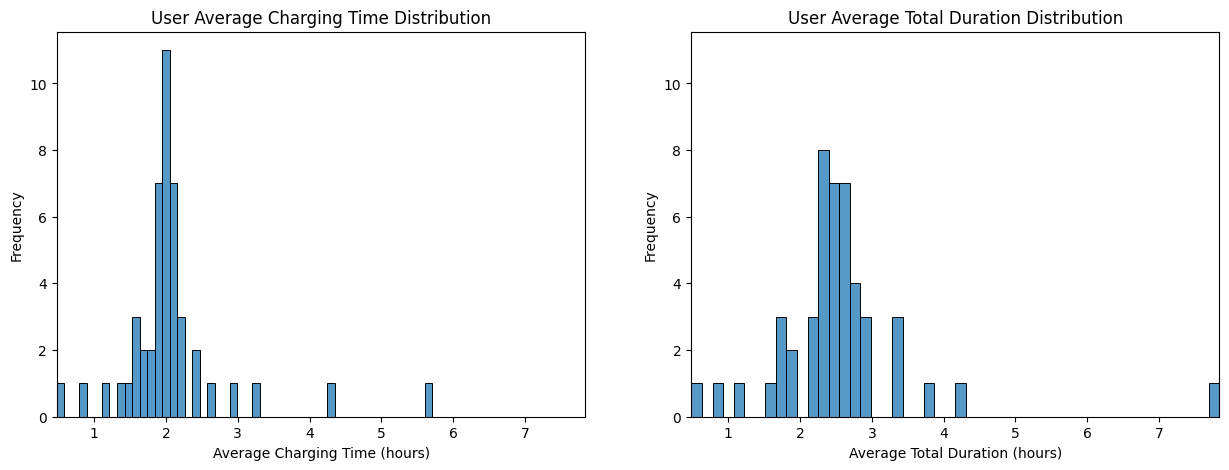

In [396]:
# Usage by Station Name
station_charging = df.groupby('Station Name')['Charging Time (hours)'].mean()
station_duration = df.groupby('Station Name')['Total Duration (hours)'].mean()


fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(station_charging, bins=50, ax=axs[0])
axs[0].set_title('User Average Charging Time Distribution')
axs[0].set_xlabel('Average Charging Time (hours)')
axs[0].set_ylabel('Frequency')

sns.histplot(station_duration, bins=50, ax=axs[1])
axs[1].set_title('User Average Total Duration Distribution')
axs[1].set_xlabel('Average Total Duration (hours)')
axs[1].set_ylabel('Frequency')

x_min = min(station_charging.min(), station_duration.min())
x_max = max(station_charging.max(), station_duration.max())
y_min, y_max = 0, max(axs[0].get_ylim()[1], axs[1].get_ylim()[1])

for ax in axs:
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.show()


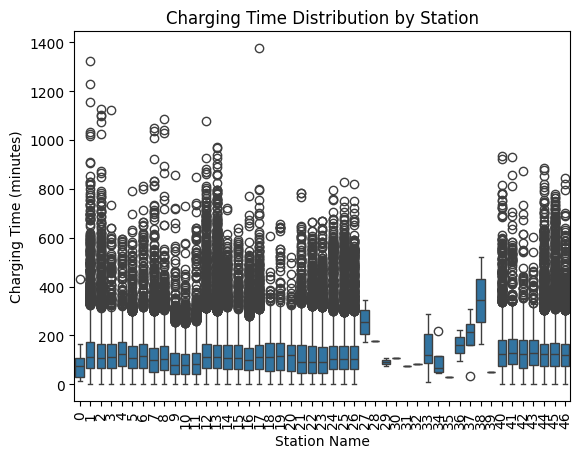

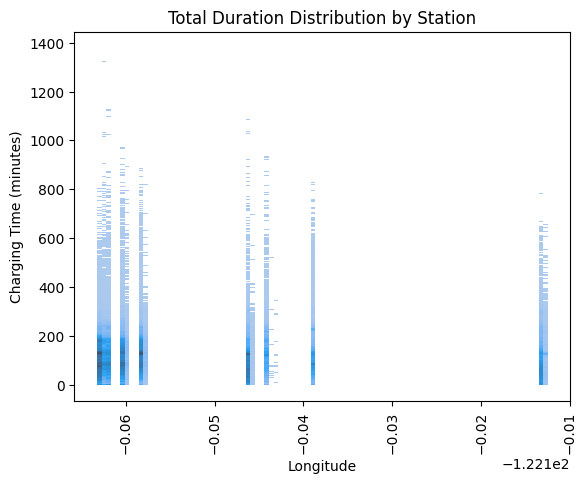

In [349]:
#Boxplot over usage for each station (no subplot)
sns.boxplot(x='Station Name', y='Charging Time (minutes)', data=df)
plt.xticks(rotation=90)
plt.title('Charging Time Distribution by Station')
plt.show()

sns.histplot(x='Port T', y='Charging Time (minutes)', data=df)
plt.xticks(rotation=90)
plt.title('Total Duration Distribution by Station')
plt.show()

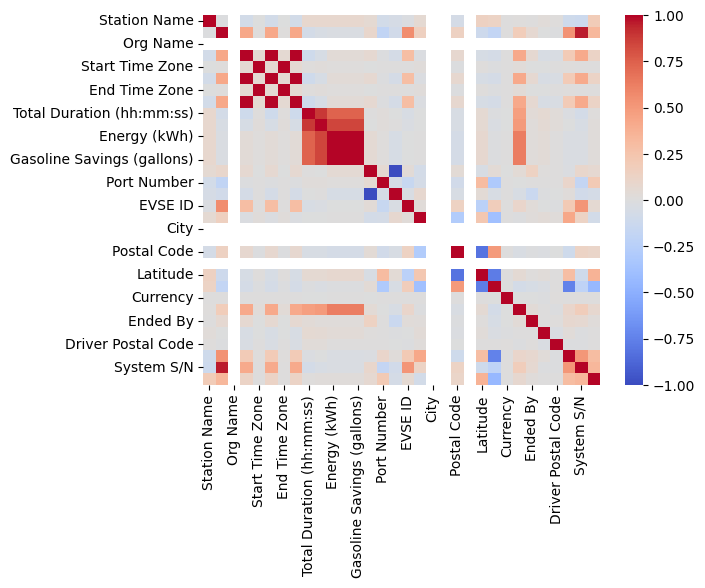

In [133]:
corr_matrix = df.corr(method='pearson')

# Plot heatmap
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

## Clustering based on 6. Clustering-solutions
----

In [255]:
df['user'] = df.index
grouped=list(set(df['user'])) 

users={}
for g in grouped:
    users_ts=np.array(df[df.user==g]['Charging Time (hh:mm:ss)'])  # NOTE: For each day we have 96 observations (4 observations each hour is 96 observations each day). Day ts is the vector of observations for each day in grouped 
    users[g]=users_ts

In [282]:
dfs = [pd.DataFrame({key: value}) for key, value in users.items()]
d_new = pd.concat(dfs, axis=1)
d_new = d_new.transpose()


In [283]:
#From object to minutes
for col in d_new.columns:
    d_new[col] = pd.to_datetime(d_new[col], format='%H:%M:%S').dt.hour*60 + pd.to_datetime(d_new[col], format='%H:%M:%S').dt.minute

d_new

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
100673,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
655385.0,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3634621,89,19.0,38.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2883621.0,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4671,185,184.0,139.0,417.0,163.0,35.0,246.0,54.0,49.0,365.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097101.0,36,58.0,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
917461.0,48,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
524259.0,43,64.0,94.0,46.0,73.0,103.0,99.0,54.0,95.0,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131055.0,99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [285]:
d_new = d_new.fillna(0)
d_new

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
100673,227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655385.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3634621,89,19.0,38.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2883621.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4671,185,184.0,139.0,417.0,163.0,35.0,246.0,54.0,49.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097101.0,36,58.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
917461.0,48,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
524259.0,43,64.0,94.0,46.0,73.0,103.0,99.0,54.0,95.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
131055.0,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


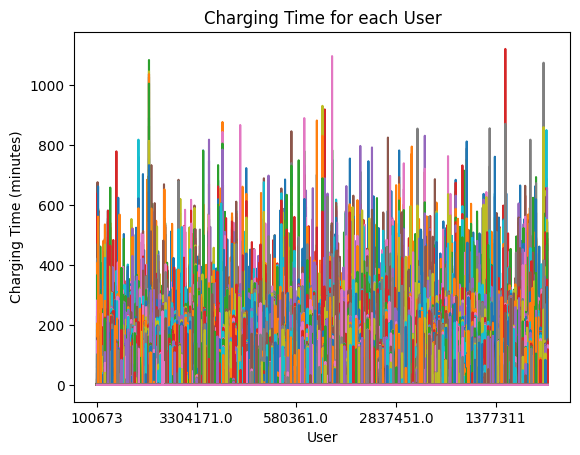

In [286]:
#plot of the charging time for each user
d_new.plot(legend=False)
plt.xlabel('User')
plt.ylabel('Charging Time (minutes)')
plt.title('Charging Time for each User')
plt.show()


In [292]:
d_new.iloc[100, :].sum()

133.0

In [293]:
dt_cluster=d_new                        # Copy data set
ClusterList=np.ones(dt_cluster.shape[0]) # Create a list of cluster
for i in range(0,dt_cluster.shape[0]):
    if dt_cluster.iloc[i,:].sum()>300:
        ClusterList[i]=2

print('List of labels')
ClusterList[:10]

List of labels


array([1., 1., 1., 1., 2., 2., 1., 1., 2., 1.])

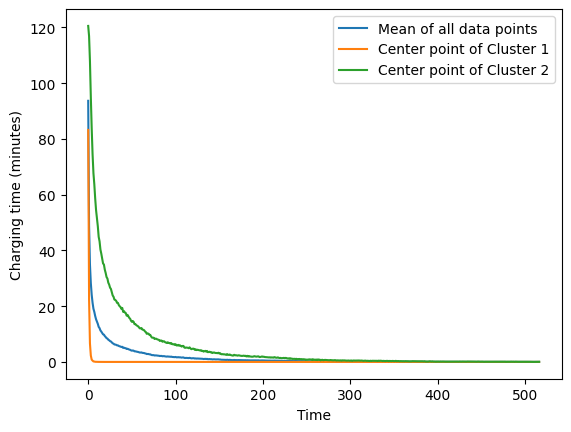

In [309]:
Center_cluster_1=dt_cluster.iloc[np.where(ClusterList==1)[0],:].mean()
Center_cluster_2=dt_cluster.iloc[np.where(ClusterList==2)[0],:].mean()
plt.plot(dt_cluster.mean())
plt.plot(Center_cluster_1)
plt.plot(Center_cluster_2)
plt.legend(['Mean of all data points','Center point of Cluster 1','Center point of Cluster 2'])
plt.xlabel('Time')
plt.ylabel('Charging time (minutes)')
plt.show()

In [295]:
def RMSE(x,Y):
    return np.sqrt(((x - Y) ** 2).mean())

# For each observation, compute the error between the centroid of the Cluster 
# (e.g., Center_cluster) and the observation. Assign the observation to the closest cluster

for i in range(0,dt_cluster.shape[1]):
    rmse1=RMSE(dt_cluster.iloc[i,:],Center_cluster_1)
    rmse2=RMSE(dt_cluster.iloc[i,:],Center_cluster_2)
    if rmse1<= rmse2:
        ClusterList[i]=1
    else:
        ClusterList[i]=2
        
New_Center_cluster_1=dt_cluster.iloc[np.where(ClusterList==1)[0],:].mean()
New_Center_cluster_2=dt_cluster.iloc[np.where(ClusterList==2)[0],:].mean()

rmse_c1=RMSE(New_Center_cluster_1,Center_cluster_1)
rmse_c2=RMSE(New_Center_cluster_2,Center_cluster_2)

max_rmse=max(rmse_c1,rmse_c2)
print('The maximum Rmse for the new centroids is:',str(max_rmse))

The maximum Rmse for the new centroids is: 0.1002767784600102


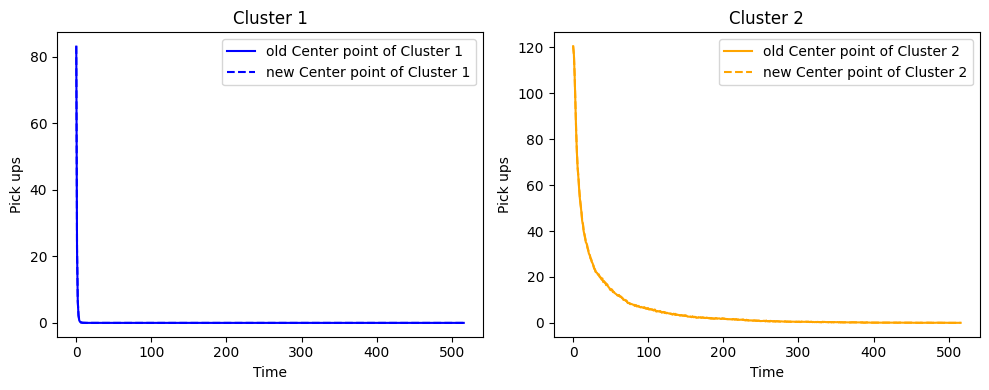

In [296]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))  # 1 row, 2 columns

# Plot the Cluster 1
axs[0].plot(Center_cluster_1,color='Blue', label='old Center point of Cluster 1')
axs[0].plot(New_Center_cluster_1,color='Blue',linestyle='--', label='new Center point of Cluster 1')
axs[0].set_title('Cluster 1')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Pick ups')
axs[0].legend()

# Plot the 2
axs[1].plot(Center_cluster_2,color='Orange', label='old Center point of Cluster 2')
axs[1].plot(New_Center_cluster_2,color='Orange',linestyle='--', label='new Center point of Cluster 2')
axs[1].set_title('Cluster 2')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Pick ups')
axs[1].legend()
# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [298]:
from sklearn.cluster import KMeans
K=8
k=KMeans(K)
k.fit(d_new)

KMeans()

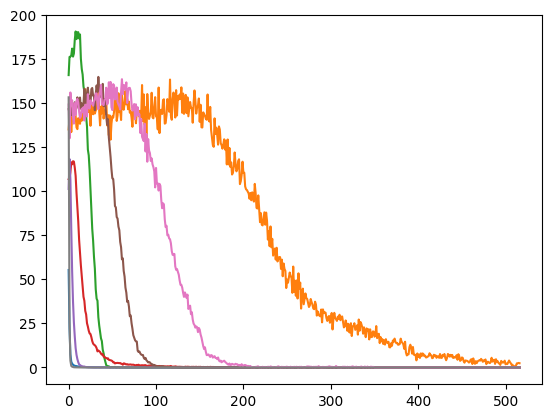

In [300]:
x=range(517)
for c in k.cluster_centers_:
    plt.plot(x, c)
    

In [314]:
dt_clusters=d_new.copy()
dt_clusters['cluster']=k.fit_predict(d_new)
dt_clusters

,0,1,2,3,4,5,6,7,8,9,...,508,509,510,511,512,513,514,515,516,cluster
100673,227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
655385.0,133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3634621,89,19.0,38.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2883621.0,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4671,185,184.0,139.0,417.0,163.0,35.0,246.0,54.0,49.0,365.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097101.0,36,58.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
917461.0,48,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
524259.0,43,64.0,94.0,46.0,73.0,103.0,99.0,54.0,95.0,79.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
131055.0,99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [315]:
dt_clusters.index.names=['user']  
dt_clusters=dt_clusters.reset_index()
dt_merged=pd.merge(df[['Station Name', 'Start Date', 'End Date', 'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)', 'Latitude', 'user']], 
                   dt_clusters[['user', 'cluster']], on='user', how='inner') 

dt_merged

,Station Name,Start Date,End Date,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Latitude,user,cluster
0,7,2016-08-01 05:21:00,2016-08-01 06:49:00,2016-08-01 06:49:00,01:27:58,37.426155,523487,5
1,8,2016-08-01 06:01:00,2016-08-01 10:58:00,2016-08-01 10:58:00,04:56:27,37.426182,141845,7
2,7,2016-08-01 06:03:00,2016-08-01 09:15:00,2016-08-01 09:15:00,03:12:17,37.426155,203603,0
3,13,2016-08-01 06:10:00,2016-08-01 08:54:00,2016-08-01 08:54:00,02:44:25,37.444359,126575,5
4,14,2016-08-01 06:13:00,2016-08-01 09:33:00,2016-08-01 09:33:00,03:19:24,37.443558,191743,2
...,...,...,...,...,...,...,...,...
169382,11,2020-12-31 15:51:00,2020-12-31 17:30:00,2020-12-31 17:31:00,01:38:27,37.426228,2652881,6
169383,42,2020-12-31 16:48:00,2020-12-31 20:31:00,2020-12-31 20:32:00,03:43:01,37.448284,242661,2
169384,21,2020-12-31 17:28:00,2021-01-01 10:56:00,2021-01-01 10:57:00,17:28:14,37.422104,449995,2
169385,42,2020-12-31 17:49:00,2020-12-31 21:55:00,2020-12-31 21:56:00,04:05:34,37.448284,804075,5


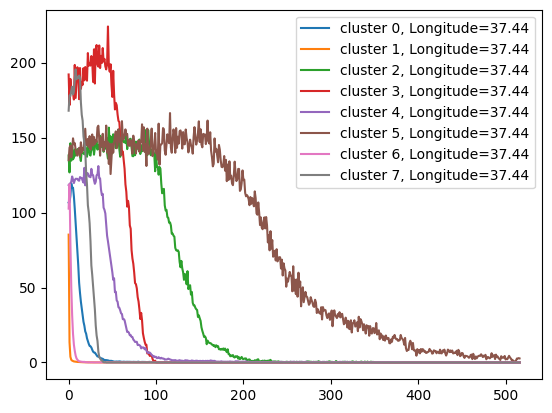

In [316]:
for i in range(K):
    plt.plot(x, k.cluster_centers_[i], 
             label="cluster %d, Longitude=%.2f"%(i, np.mean(dt_merged[dt_merged.cluster==i]['Latitude'])))
plt.legend();

# **Mandatory Component**
---

# **Exploratory Component**
---

# **Conclusions**
---